# Table of Contents
- [Introduction](#intro)
- [Gather](#gather)
    - [Twitter Archive Enhanced - CSV File](#csv-file)
    - [Image Predictions - Request](#Request)
    - [Tweets - API](#api)
- [Assess](#assess)
    - [Quality](#quality)
    - [Tidiness](#tidiness)
- [Clean](#clean)
- [Storing and Acting on Wrangled Data](#store)
    - [Storing Data](#st)
    - [Acting on Data](#act)


<a id='intro'></a>
## Introduction
This project aims to let the students get familiar with the data wrangling stage, this stage contains three main areas, gathering data, assessing data and cleaning data.


<a id='gather'></a>
## Gather

In this step, there will be three types of gathering data. First one is from a CSV file, the second one is from a URL request and the third one is from Twitter API

<a id='csv-file'></a>
### Twitter Archive Enhanced - CSV File

This file was downloaded manually from Udacity page



In [76]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import pprint as pp
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
Twitter_Archive_Enhanced = pd.read_csv('twitter-archive-enhanced.csv')
Twitter_Archive_Enhanced.head()



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [78]:
Twitter_Archive_Enhanced.shape

(2356, 17)

In [79]:
Twitter_Archive_Enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<a id='Request'></a>
### Image Predictions - Request

The URL was provided in the Project Details page from Udacity.

In [80]:
# Download the file from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)


with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)
    
Image_Predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
Image_Predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [81]:
Image_Predictions.shape

(2075, 12)

In [82]:
Image_Predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a id='api'></a>
### Tweets - API

In this step, we need to collect tweets from Twitter using the Twitter API key

In [83]:
# This is just to use the Twitter API
consumer_key = '1U1xWVzK9GZaA7nnuz7wGx3fi'
consumer_secret = 'MsLztfRJAxMSu4PHQLBxJ9V5iCpi7QQZ08e15DKgu8bENFzxJR'
access_token = '4623585315-NCuG2MGMsxhvRviAGxJ64g5Koe0yksHTCrPlS6y'
access_secret = 'TUXMhGshFeJZBnNBjQnVElsoulBUPp5NStZrLn2MMntDv'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [84]:
df_list = []
errors = []

for tweet_id in Twitter_Archive_Enhanced['tweet_id']:
    try:
        Tweet_Status = api.get_status(tweet_id, tweet_mode='extended')
        favorites = Tweet_Status['favorite_count']
        retweets = Tweet_Status['retweet_count']
        created_at = Tweet_Status['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'created_at': pd.to_datetime(created_at)})
    except Exception as e:
        print(str(tweet_id) + " : " + str(e))
        errors.append(tweet_id)

888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 : [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 : [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 : [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 : [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 : [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 : [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 : [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 : [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 : [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 : [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 : [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 : [{'code

Rate limit reached. Sleeping for: 357


754011816964026368 : [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 : [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 290


In [85]:
print("The lengh of the result", len(df_list))
print("The lengh of the errors", len(errors))

The lengh of the result 2337
The lengh of the errors 19


In [86]:
errors

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

- We have only got 2337 out of 2356. So there is 19 that we have not got yet.
- So we are going to run those 19 separately.
- This is going to be faster and easier since we store them in a separate list.

In [87]:
# We repeat the same operation for the tweet_ids that we coudln't get and append the result to df_list
ee_list = []
for e in errors:
    try:
        favorites = Tweet_Status['favorite_count']
        retweets = Tweet_Status['retweet_count']
        created_at = Tweet_Status['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'created_at': pd.to_datetime(created_at)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        ee_list.append(e)

In [88]:
print("The lengh of the result", len(df_list))
print("The lengh of the errors", len(ee_list))

The lengh of the result 2356
The lengh of the errors 0


In [89]:
Tweets_DataFrame = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets', 'created_at'])
Tweets_DataFrame.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)
Tweets_DataFrame = pd.read_csv('tweet_json.txt', encoding = 'utf-8')


In [90]:
Tweets_DataFrame

,tweet_id,favorites,retweets,created_at
0,892420643555336193,37477,8163,2017-08-01 16:23:56+00:00
1,892177421306343426,32215,6042,2017-08-01 00:17:27+00:00
2,891815181378084864,24279,3999,2017-07-31 00:18:03+00:00
3,891689557279858688,40805,8317,2017-07-30 15:58:51+00:00
4,891327558926688256,39019,9011,2017-07-29 16:00:24+00:00
5,891087950875897856,19608,2990,2017-07-29 00:08:17+00:00
6,890971913173991426,11457,1984,2017-07-28 16:27:12+00:00
7,890729181411237888,63208,18130,2017-07-28 00:22:40+00:00
8,890609185150312448,26972,4104,2017-07-27 16:25:51+00:00
9,890240255349198849,30910,7094,2017-07-26 15:59:51+00:00


<a id='assess'></a>
## Assess

In this step, there will be two types of assessing. Programmatically and visually.
In both types, we'll try to find the quality issues and the tidiness issues.

In [91]:
Twitter_Archive_Enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [92]:
Twitter_Archive_Enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [93]:
Twitter_Archive_Enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [94]:
Twitter_Archive_Enhanced['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Buddy          7
Daisy          7
Toby           7
an             7
Rusty          6
Milo           6
Oscar          6
Dave           6
Stanley        6
Jack           6
Koda           6
Jax            6
Leo            6
Scout          6
Bella          6
Louis          5
            ... 
Claude         1
Deacon         1
Chuq           1
BeBe           1
Jarvis         1
Petrick        1
Charleson      1
Rambo          1
Jersey         1
Mack           1
Kuyu           1
Mabel          1
Dietrich       1
Kawhi          1
Snickers       1
Lassie         1
Kendall        1
Shadoe         1
Tonks          1
Molly          1
Humphrey       1
Fabio          1
Strider        1
Lilah          1
Bookstore      1
Ozzie          1
Biden          1
Oddie         

In [95]:
Twitter_Archive_Enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [96]:
Twitter_Archive_Enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [97]:
Image_Predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [98]:
Image_Predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [99]:
Image_Predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [100]:
Image_Predictions['jpg_url'].value_counts()

https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg                                            2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                       

In [101]:
Tweets_DataFrame.head()

,tweet_id,favorites,retweets,created_at
0,892420643555336193,37477,8163,2017-08-01 16:23:56+00:00
1,892177421306343426,32215,6042,2017-08-01 00:17:27+00:00
2,891815181378084864,24279,3999,2017-07-31 00:18:03+00:00
3,891689557279858688,40805,8317,2017-07-30 15:58:51+00:00
4,891327558926688256,39019,9011,2017-07-29 16:00:24+00:00


In [102]:
Tweets_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
tweet_id      2356 non-null int64
favorites     2356 non-null int64
retweets      2356 non-null int64
created_at    2356 non-null object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [103]:
Tweets_DataFrame.describe()

,tweet_id,favorites,retweets
count,2.356000e+03,2356.000000,2356.000000
mean,7.414559e+17,7784.783956,2850.600170
std,6.830623e+16,12095.057901,4832.665712
min,6.660209e+17,0.000000,1.000000
25%,6.776265e+17,1377.500000,566.500000
50%,7.172346e+17,3383.500000,1325.000000
75%,7.985960e+17,9545.750000,3316.000000
max,8.924206e+17,161850.000000,82245.000000


In [104]:
Tweets_DataFrame['tweet_id'].value_counts()

666020888022790149    20
749075273010798592     1
743510151680958465     1
825120256414846976     1
769212283578875904     1
700462010979500032     1
780858289093574656     1
699775878809702401     1
880095782870896641     1
760521673607086080     1
776477788987613185     1
691820333922455552     1
715696743237730304     1
714606013974974464     1
760539183865880579     1
813157409116065792     1
676430933382295552     1
798644042770751489     1
833722901757046785     1
741099773336379392     1
818259473185828864     1
670704688707301377     1
667160273090932737     1
674394782723014656     1
672082170312290304     1
670093938074779648     1
759923798737051648     1
809920764300447744     1
805487436403003392     1
838085839343206401     1
                      ..
720775346191278080     1
879492040517615616     1
785927819176054784     1
834209720923721728     1
857062103051644929     1
825026590719483904     1
758405701903519748     1
668986018524233728     1
690938899477221376     1


<a id='quality'></a>
### Quality

##### Twitter_Archive_Enhanced
    1- The following attributes should be (int) or (string) instead of float
    [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id].
    String is better since we are not going to do any calculations.
    
    2- The following attributes should be (datetime) instead of String
    [timestamp, retweeted_status_timestamp]
    
    3- The following attributes have some invalid values
    [name, rating_denominator, rating_numerator]
    
    4- The following attributes are not needed since we only care about original tweet
    [in_reply_to_user_id, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp]
    
##### Image_Predictions
    1- This dataset is missing some values.
    
    2- Some jpg_url are used for more than one tweet.
    

##### Tweets_DataFrame
    1- The following attributes should be (datetime) instead of String
    [created_at]
    
    2- This tweet [666020888022790149] is duplicated 20 times.
    
    3- The attribute [created_at] is the same as The attribute [timestamp]. So we don't need both

    


<a id='tidiness'></a>
### Tidiness

    - We need one table that is a subset of these 3 tables
    - Number of rows is not the same in these 3 tables
    
##### Twitter_Archive_Enhanced
    1- Not all attributes are important in this data frame.
    
    2- The following attributes are better represented as data categories in a single column
    [Doggo, floofer, pupper, puppo]
    
    3- source looks messy. There is a better way to do it
    

##### Image_Predictions
    1- Not all attributes are important in this data frame.


##### Tweets_DataFrame



<a id='clean'></a>
## Clean

In this step, we'll try to fix and clean our findings in the previous step.

Define
<br>
<font color=blue> First, let's make a copy of all of our data frame. In case something went wrong the original will be safe
 </font>

Code

In [105]:
Twitter_Archive_Enhanced_Copy = Twitter_Archive_Enhanced.copy()
Image_Predictions_Copy = Image_Predictions.copy()
Tweets_DataFrame_Copy = Tweets_DataFrame.copy()


test

In [106]:
Twitter_Archive_Enhanced_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [107]:
Image_Predictions_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [108]:
Tweets_DataFrame_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
tweet_id      2356 non-null int64
favorites     2356 non-null int64
retweets      2356 non-null int64
created_at    2356 non-null object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


Define
<br>
<font color=blue> Now, lets remove all the tweets that are not origenal tweets. Like retweets and replies
 </font>


Code

In [109]:
Twitter_Archive_Enhanced_Copy = Twitter_Archive_Enhanced_Copy[Twitter_Archive_Enhanced_Copy.retweeted_status_id.isnull()]
Twitter_Archive_Enhanced_Copy = Twitter_Archive_Enhanced_Copy[Twitter_Archive_Enhanced_Copy.in_reply_to_status_id.isnull()]

Twitter_Archive_Enhanced_Copy.drop(['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], inplace = True, axis = 1) 

Twitter_Archive_Enhanced_Copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Test

In [110]:
Twitter_Archive_Enhanced_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


Define
<br>
<font color=blue> Now, let's join all the 3 tables into one table
 </font>

Code

In [111]:
df = pd.merge(Twitter_Archive_Enhanced_Copy, Image_Predictions_Copy, how = 'left', on = ['tweet_id'] )
df = pd.merge(df, Tweets_DataFrame_Copy, how = 'left', on = ['tweet_id'])
df.to_csv('df_master.csv')
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,created_at
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,37477.0,8163.0,2017-08-01 16:23:56+00:00
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,32215.0,6042.0,2017-08-01 00:17:27+00:00
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,24279.0,3999.0,2017-07-31 00:18:03+00:00
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40805.0,8317.0,2017-07-30 15:58:51+00:00
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39019.0,9011.0,2017-07-29 16:00:24+00:00
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,19608.0,2990.0,2017-07-29 00:08:17+00:00
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,11457.0,1984.0,2017-07-28 16:27:12+00:00
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,63208.0,18130.0,2017-07-28 00:22:40+00:00
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,26972.0,4104.0,2017-07-27 16:25:51+00:00
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,30910.0,7094.0,2017-07-26 15:59:51+00:00


Test

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 26 columns):
tweet_id              2116 non-null int64
timestamp             2116 non-null object
source                2116 non-null object
text                  2116 non-null object
expanded_urls         2113 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
name                  2116 non-null object
doggo                 2116 non-null object
floofer               2116 non-null object
pupper                2116 non-null object
puppo                 2116 non-null object
jpg_url               1990 non-null object
img_num               1990 non-null float64
p1                    1990 non-null object
p1_conf               1990 non-null float64
p1_dog                1990 non-null object
p2                    1990 non-null object
p2_conf               1990 non-null float64
p2_dog                1990 non-null object
p3                    1990 non-nu

Define
<br>
<font color=blue> Now, let's make a copy of our data frame. So if we made a mistake the original doesn't get affected.
 </font>

Code

In [113]:
df_Copy = df.copy()

Test

In [114]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 26 columns):
tweet_id              2116 non-null int64
timestamp             2116 non-null object
source                2116 non-null object
text                  2116 non-null object
expanded_urls         2113 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
name                  2116 non-null object
doggo                 2116 non-null object
floofer               2116 non-null object
pupper                2116 non-null object
puppo                 2116 non-null object
jpg_url               1990 non-null object
img_num               1990 non-null float64
p1                    1990 non-null object
p1_conf               1990 non-null float64
p1_dog                1990 non-null object
p2                    1990 non-null object
p2_conf               1990 non-null float64
p2_dog                1990 non-null object
p3                    1990 non-nu

Define
<br>
<font color=blue> Now, let's remove all duplicated tweets
 </font>

Code

In [115]:
df_Copy['tweet_id'].value_counts()

666020888022790149    20
749075273010798592     1
760539183865880579     1
715696743237730304     1
691820333922455552     1
776477788987613185     1
760521673607086080     1
880095782870896641     1
699775878809702401     1
780858289093574656     1
700462010979500032     1
769212283578875904     1
738883359779196928     1
743510151680958465     1
833722901757046785     1
805487436403003392     1
842765311967449089     1
685315239903100929     1
673686845050527744     1
666051853826850816     1
809920764300447744     1
818259473185828864     1
759923798737051648     1
670093938074779648     1
672082170312290304     1
667160273090932737     1
756651752796094464     1
743545585370791937     1
671163268581498880     1
770655142660169732     1
                      ..
794926597468000259     1
825026590719483904     1
834209720923721728     1
775733305207554048     1
669564461267722241     1
879492040517615616     1
720775346191278080     1
870308999962521604     1
872261713294495745     1


In [116]:
df_Copy=df_Copy.drop_duplicates()
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 26 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

Test

In [117]:
df_Copy['tweet_id'].value_counts()

749075273010798592    1
760539183865880579    1
715696743237730304    1
691820333922455552    1
776477788987613185    1
760521673607086080    1
880095782870896641    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
769212283578875904    1
738883359779196928    1
743510151680958465    1
833722901757046785    1
805487436403003392    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
666051853826850816    1
809920764300447744    1
818259473185828864    1
759923798737051648    1
670093938074779648    1
672082170312290304    1
667160273090932737    1
756651752796094464    1
743545585370791937    1
671163268581498880    1
770655142660169732    1
793120401413079041    1
                     ..
794926597468000259    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
870308999962521604    1
872261713294495745    1
693155686491000832    1
6679114255626690

Define
<br>
<font color=blue>Now, let's remove all tweets that has no image 
 </font>

Code

In [118]:
df_Copy=df_Copy.dropna(subset = ['jpg_url'])
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

Test

In [119]:
df_Copy['jpg_url'].isnull().values.sum()

0

Define
<br>
<font color=blue> Now, let's fix the source
 </font>

Code

In [120]:
df_Copy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [121]:
source=df_Copy.source.unique().tolist()
source

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [122]:
category = ["iPhone", "Web Client", "TweetDeck"]
df_Copy.source.replace(source, category, inplace = True)
df_Copy.source = df_Copy.source.astype('category')

Test

In [123]:
df_Copy['source'].value_counts()

iPhone        1932
Web Client      28
TweetDeck       11
Name: source, dtype: int64

Define
<br>
<font color=blue> Now, let's fix the ratings
 </font>

Code

In [124]:
df_Copy = df_Copy[df_Copy.rating_numerator < 15]
df_Copy = df_Copy[df_Copy.rating_denominator == 10]

df_Copy['rating'] = df_Copy.rating_numerator / df_Copy.rating_denominator

df_Copy.drop(['rating_numerator', 'rating_denominator'], inplace = True, axis = 1)

df_Copy

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,created_at,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,...,bagel,0.085851,False,banana,0.076110,False,37477.0,8163.0,2017-08-01 16:23:56+00:00,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,32215.0,6042.0,2017-08-01 00:17:27+00:00,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,24279.0,3999.0,2017-07-31 00:18:03+00:00,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,40805.0,8317.0,2017-07-30 15:58:51+00:00,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39019.0,9011.0,2017-07-29 16:00:24+00:00,1.2
5,891087950875897856,2017-07-29 00:08:17 +0000,iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,19608.0,2990.0,2017-07-29 00:08:17+00:00,1.3
6,890971913173991426,2017-07-28 16:27:12 +0000,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,...,Border_collie,0.199287,True,ice_lolly,0.193548,False,11457.0,1984.0,2017-07-28 16:27:12+00:00,1.3
7,890729181411237888,2017-07-28 00:22:40 +0000,iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,63208.0,18130.0,2017-07-28 00:22:40+00:00,1.3
8,890609185150312448,2017-07-27 16:25:51 +0000,iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,...,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,26972.0,4104.0,2017-07-27 16:25:51+00:00,1.3
9,890240255349198849,2017-07-26 15:59:51 +0000,iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,30910.0,7094.0,2017-07-26 15:59:51+00:00,1.4


Test

In [125]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 2096
Data columns (total 25 columns):
tweet_id         1949 non-null int64
timestamp        1949 non-null object
source           1949 non-null category
text             1949 non-null object
expanded_urls    1949 non-null object
name             1949 non-null object
doggo            1949 non-null object
floofer          1949 non-null object
pupper           1949 non-null object
puppo            1949 non-null object
jpg_url          1949 non-null object
img_num          1949 non-null float64
p1               1949 non-null object
p1_conf          1949 non-null float64
p1_dog           1949 non-null object
p2               1949 non-null object
p2_conf          1949 non-null float64
p2_dog           1949 non-null object
p3               1949 non-null object
p3_conf          1949 non-null float64
p3_dog           1949 non-null object
favorites        1945 non-null float64
retweets         1945 non-null float64
created_at  

Define
<br>
<font color=blue> Now, let's combaind doggo, floofer, pupper and puppo into one column as categories
 </font>

Code

In [152]:
df_Copy['stage'] = ['doggo' if 'doggo' in i
                     else 'floofer' if 'floofer' in i
                     else 'pupper' if 'pupper' in i
                     else 'puppo' if 'puppo' in i
                     else np.nan for i in df_Copy['text'].str.lower()]

# Handle multiple stages
df_Copy.loc[df_Copy.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_Copy.loc[df_Copy.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_Copy.loc[df_Copy.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
# Handle missing values
df_Copy.loc[df_Copy.stage == '', 'stage'] = np.nan


df_Copy['stage'] = df_Copy['stage'].astype('category')
df_Copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

KeyError: "['doggo' 'floofer' 'pupper' 'puppo'] not found in axis"

In [127]:
df_Copy

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,created_at,rating,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,...,0.085851,False,banana,0.076110,False,37477.0,8163.0,2017-08-01 16:23:56+00:00,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,...,0.090647,True,papillon,0.068957,True,32215.0,6042.0,2017-08-01 00:17:27+00:00,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,...,0.078253,True,kelpie,0.031379,True,24279.0,3999.0,2017-07-31 00:18:03+00:00,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,...,0.168086,True,spatula,0.040836,False,40805.0,8317.0,2017-07-30 15:58:51+00:00,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,...,0.225770,True,German_short-haired_pointer,0.175219,True,39019.0,9011.0,2017-07-29 16:00:24+00:00,1.2,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,...,0.116317,True,Indian_elephant,0.076902,False,19608.0,2990.0,2017-07-29 00:08:17+00:00,1.3,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,...,0.199287,True,ice_lolly,0.193548,False,11457.0,1984.0,2017-07-28 16:27:12+00:00,1.3,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,...,0.178406,True,Pembroke,0.076507,True,63208.0,18130.0,2017-07-28 00:22:40+00:00,1.3,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,26972.0,4104.0,2017-07-27 16:25:51+00:00,1.3,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,...,0.451038,True,Chihuahua,0.029248,True,30910.0,7094.0,2017-07-26 15:59:51+00:00,1.4,doggo


Test

In [128]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id         1949 non-null int64
timestamp        1949 non-null object
source           1949 non-null category
text             1949 non-null object
expanded_urls    1949 non-null object
name             1949 non-null object
jpg_url          1949 non-null object
img_num          1949 non-null float64
p1               1949 non-null object
p1_conf          1949 non-null float64
p1_dog           1949 non-null object
p2               1949 non-null object
p2_conf          1949 non-null float64
p2_dog           1949 non-null object
p3               1949 non-null object
p3_conf          1949 non-null float64
p3_dog           1949 non-null object
favorites        1945 non-null float64
retweets         1945 non-null float64
created_at       1945 non-null object
rating           1949 non-null float64
stage            329 non-null category
dtypes: category(2), float64(7), int64(1), objec

Define
<br>
<font color=blue> Now, let's fix the values of name
 </font>

Code

In [129]:
df_Copy['name'].value_counts()

None         511
a             54
Charlie       11
Oliver        10
Lucy          10
Cooper        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Toby           7
the            7
Lola           7
Daisy          7
Jax            6
Koda           6
Bella          6
Stanley        6
Bo             6
Buddy          5
Scout          5
Chester        5
Rusty          5
Bailey         5
Milo           5
Louis          5
an             5
Leo            5
Dave           5
Oscar          5
            ... 
Bobbay         1
Nico           1
Shikha         1
Sprinkles      1
Lilly          1
Lilah          1
Strider        1
Fabio          1
Kuyu           1
Samsom         1
Orion          1
Chaz           1
Zeek           1
Mike           1
Hubertson      1
Hurley         1
Rambo          1
Mack           1
Mabel          1
Sam            1
Kaiya          1
Kawhi          1
Snickers       1
Lassie         1
Kendall        1
Shadoe         1
Jersey         1
Tonks         

In [130]:
df_Copy['name'] = df_Copy['name'].replace('None', np.nan)
df_Copy['name'] = df_Copy['name'].replace(['a', 'an', 'the'], np.nan)

Test

In [131]:
df_Copy['name'].value_counts()

Charlie      11
Lucy         10
Cooper       10
Oliver       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Daisy         7
Toby          7
Lola          7
Bo            6
Koda          6
Jax           6
Stanley       6
Bella         6
Leo           5
Buddy         5
Milo          5
Louis         5
Rusty         5
Oscar         5
Bailey        5
Chester       5
Dave          5
Scout         5
Finn          4
Gus           4
Larry         4
one           4
             ..
Julius        1
Rinna         1
Bobbay        1
Nico          1
Shikha        1
Fabio         1
Sam           1
Grizzwald     1
Mack          1
Pupcasso      1
Samsom        1
Orion         1
Chaz          1
Zeek          1
Mike          1
Hubertson     1
Hurley        1
Rambo         1
Kuyu          1
Rey           1
Mabel         1
Dietrich      1
Kaiya         1
Kawhi         1
Snickers      1
Lassie        1
Kendall       1
Shadoe        1
Jersey        1
Skye          1
Name: name, Length: 927,

Define
<br>
<font color=blue> The columns created_at and timestamp have the same values. We don't need them both
 </font>

Code

In [132]:
df_Copy.drop(['created_at'], axis=1, inplace=True)

Test

In [133]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 2096
Data columns (total 21 columns):
tweet_id         1949 non-null int64
timestamp        1949 non-null object
source           1949 non-null category
text             1949 non-null object
expanded_urls    1949 non-null object
name             1372 non-null object
jpg_url          1949 non-null object
img_num          1949 non-null float64
p1               1949 non-null object
p1_conf          1949 non-null float64
p1_dog           1949 non-null object
p2               1949 non-null object
p2_conf          1949 non-null float64
p2_dog           1949 non-null object
p3               1949 non-null object
p3_conf          1949 non-null float64
p3_dog           1949 non-null object
favorites        1945 non-null float64
retweets         1945 non-null float64
rating           1949 non-null float64
stage            329 non-null category
dtypes: category(2), float64(7), int64(1), object(11)
memory usage: 308.6+ KB


Define
<br>
<font color=blue> We have [p1, p1_dog, p1_conf, p2, p2_dog, p2_conf, p3, p3_dog, p3_conf]. This can be done in a better way.
 </font>

Code

In [134]:
# next let's condense the dog breed analysis
Breeds = []
Confidence_Level = []

def Get_Breeds(a1):
    if a1['p1_dog'] == True:
        Breeds.append(a1['p1'])
        Confidence_Level.append(a1['p1_conf'])
    elif a1['p2_dog'] == True:
        Breeds.append(a1['p2'])
        Confidence_Level.append(a1['p2_conf'])
    elif a1['p3_dog'] == True:
        Breeds.append(a1['p3'])
        Confidence_Level.append(a1['p3_conf'])
    else:
        Breeds.append('No_Breed')
        Confidence_Level.append(0)
      
    # this isn't about the parsing AI so the rest of this data is deletable

df_Copy.apply(Get_Breeds, axis=1)
df_Copy['Breed'] = Breeds
df_Copy['Confidence_Level'] = Confidence_Level

df_Copy.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)
df_Copy.head()

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,favorites,retweets,rating,stage,Breed,Confidence_Level
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,37477.0,8163.0,1.3,NaN,No_Breed,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,32215.0,6042.0,1.3,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,24279.0,3999.0,1.2,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,40805.0,8317.0,1.3,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,39019.0,9011.0,1.2,NaN,basset,0.555712


Test

In [135]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 2096
Data columns (total 14 columns):
tweet_id            1949 non-null int64
timestamp           1949 non-null object
source              1949 non-null category
text                1949 non-null object
expanded_urls       1949 non-null object
name                1372 non-null object
jpg_url             1949 non-null object
img_num             1949 non-null float64
favorites           1945 non-null float64
retweets            1945 non-null float64
rating              1949 non-null float64
stage               329 non-null category
Breed               1949 non-null object
Confidence_Level    1949 non-null float64
dtypes: category(2), float64(5), int64(1), object(6)
memory usage: 202.0+ KB


Define
<br>
<font color=blue> Now, let's drop the missing values of retweets and favorites
 </font>

Code

In [136]:
df_Copy['retweets'].isnull().values.sum()
df_Copy['favorites'].isnull().values.sum()

4

In [137]:
df_Copy.dropna(subset=['favorites', 'retweets'], inplace=True)


Test

In [138]:
df_Copy['retweets'].isnull().values.sum()
df_Copy['favorites'].isnull().values.sum()

0

Define
<br>
<font color=blue> Now, let's fix the datatype for each column.
 </font>

Code

In [139]:
df_Copy['tweet_id'] = df_Copy['tweet_id'].astype(object)
df_Copy['timestamp'] = pd.to_datetime(df_Copy.timestamp)
df_Copy['img_num'] = df_Copy['img_num'].astype(int)
df_Copy['favorites'] = df_Copy['favorites'].astype(int)
df_Copy['retweets'] = df_Copy['retweets'].astype(int)



Test

In [140]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 2096
Data columns (total 14 columns):
tweet_id            1945 non-null object
timestamp           1945 non-null datetime64[ns, UTC]
source              1945 non-null category
text                1945 non-null object
expanded_urls       1945 non-null object
name                1368 non-null object
jpg_url             1945 non-null object
img_num             1945 non-null int32
favorites           1945 non-null int32
retweets            1945 non-null int32
rating              1945 non-null float64
stage               329 non-null category
Breed               1945 non-null object
Confidence_Level    1945 non-null float64
dtypes: category(2), datetime64[ns, UTC](1), float64(2), int32(3), object(6)
memory usage: 178.8+ KB


<a id='store'></a>
## Storing and Acting on Wrangled Data

<a id='st'></a>
### Storing Data

In [141]:
import sqlite3

# save as CSV
df_Copy.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)
# save as DB
database = 'twitter_archive_master.db'
conn = sqlite3.connect(database)
df_Copy.to_sql('Gathered_df', conn, if_exists = 'replace', index = False)

<a id='act'></a>
### Acting on Data

In [142]:
import seaborn as sns


<font color=blue> First, let's see the relation between the number of retweets and rating
 </font>

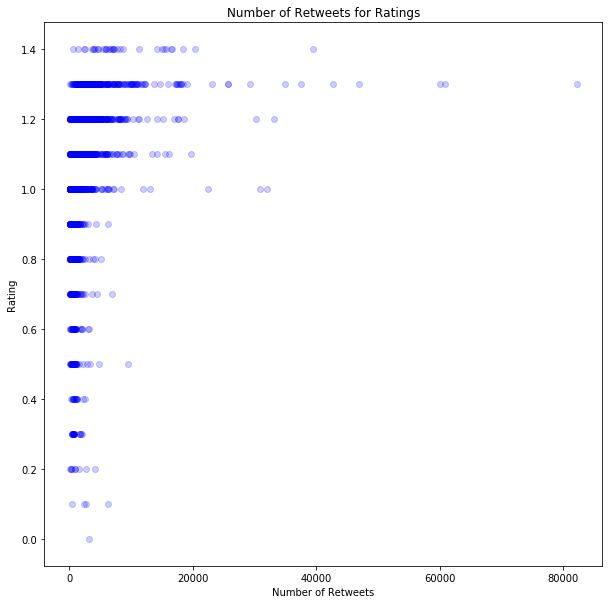

In [143]:
plt.figure(figsize=[10,10])
plt.scatter(x=df_Copy['retweets'], y=df_Copy['rating'], alpha=0.2, color='blue')
plt.xlabel('Number of Retweets')
plt.ylabel('Rating')
plt.title('Number of Retweets for Ratings');

<font color=blue> Now let's see the relation between the number of favorites and rating
 </font>

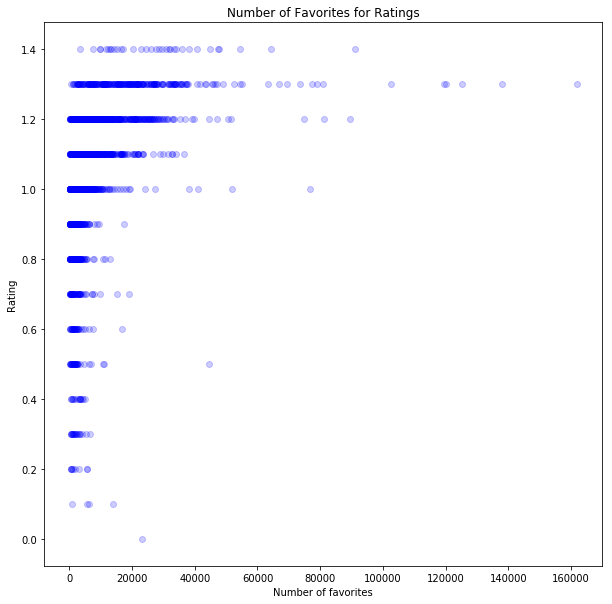

In [144]:
plt.figure(figsize=[10,10])
plt.scatter(x=df_Copy['favorites'], y=df_Copy['rating'], alpha=0.2, color='blue')
plt.xlabel('Number of favorites')
plt.ylabel('Rating')
plt.title('Number of Favorites for Ratings');

<font color=blue> Now let's see the relation between the number of favorites and the number of retweets
 </font>

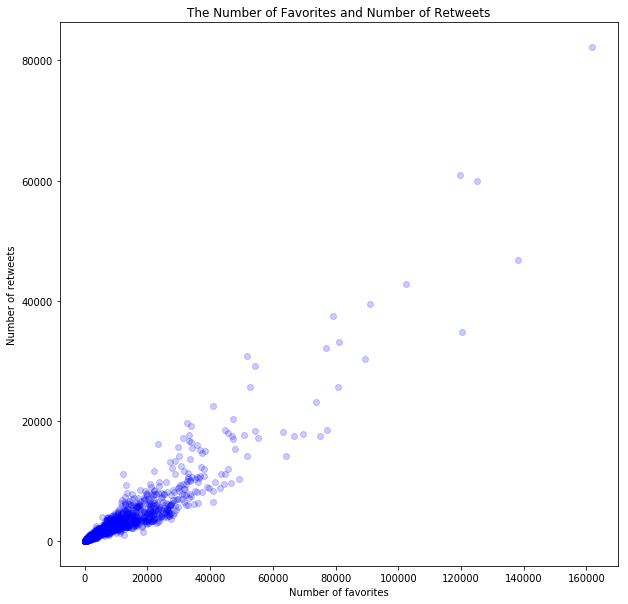

In [145]:
plt.figure(figsize=[10,10])
plt.scatter(x=df_Copy['favorites'], y=df_Copy['retweets'], alpha=0.2, color='blue')
plt.xlabel('Number of favorites')
plt.ylabel('Number of retweets')
plt.title('The Number of Favorites and Number of Retweets');

<font color=blue> Now let's see the rating over time
 </font>

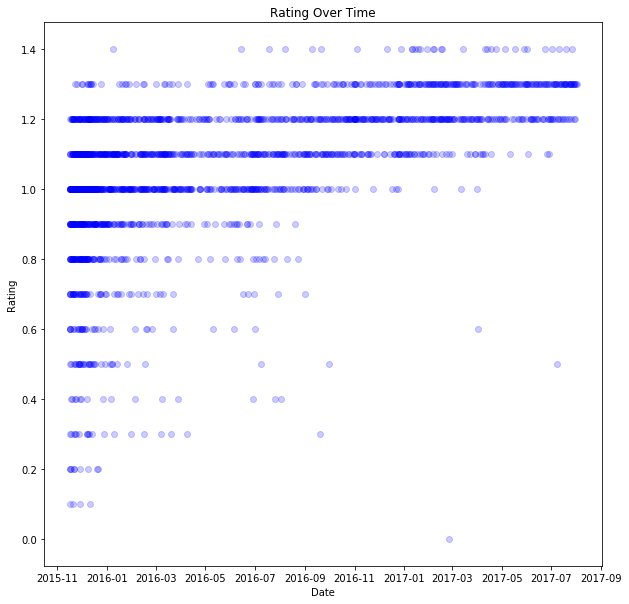

In [146]:
plt.figure(figsize=[10,10])
plt.scatter(x=df_Copy['timestamp'], y=df_Copy['rating'], alpha=0.2, color='blue')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Rating Over Time');

<font color=blue> Now let's see the average rating for each dog breed
 </font>

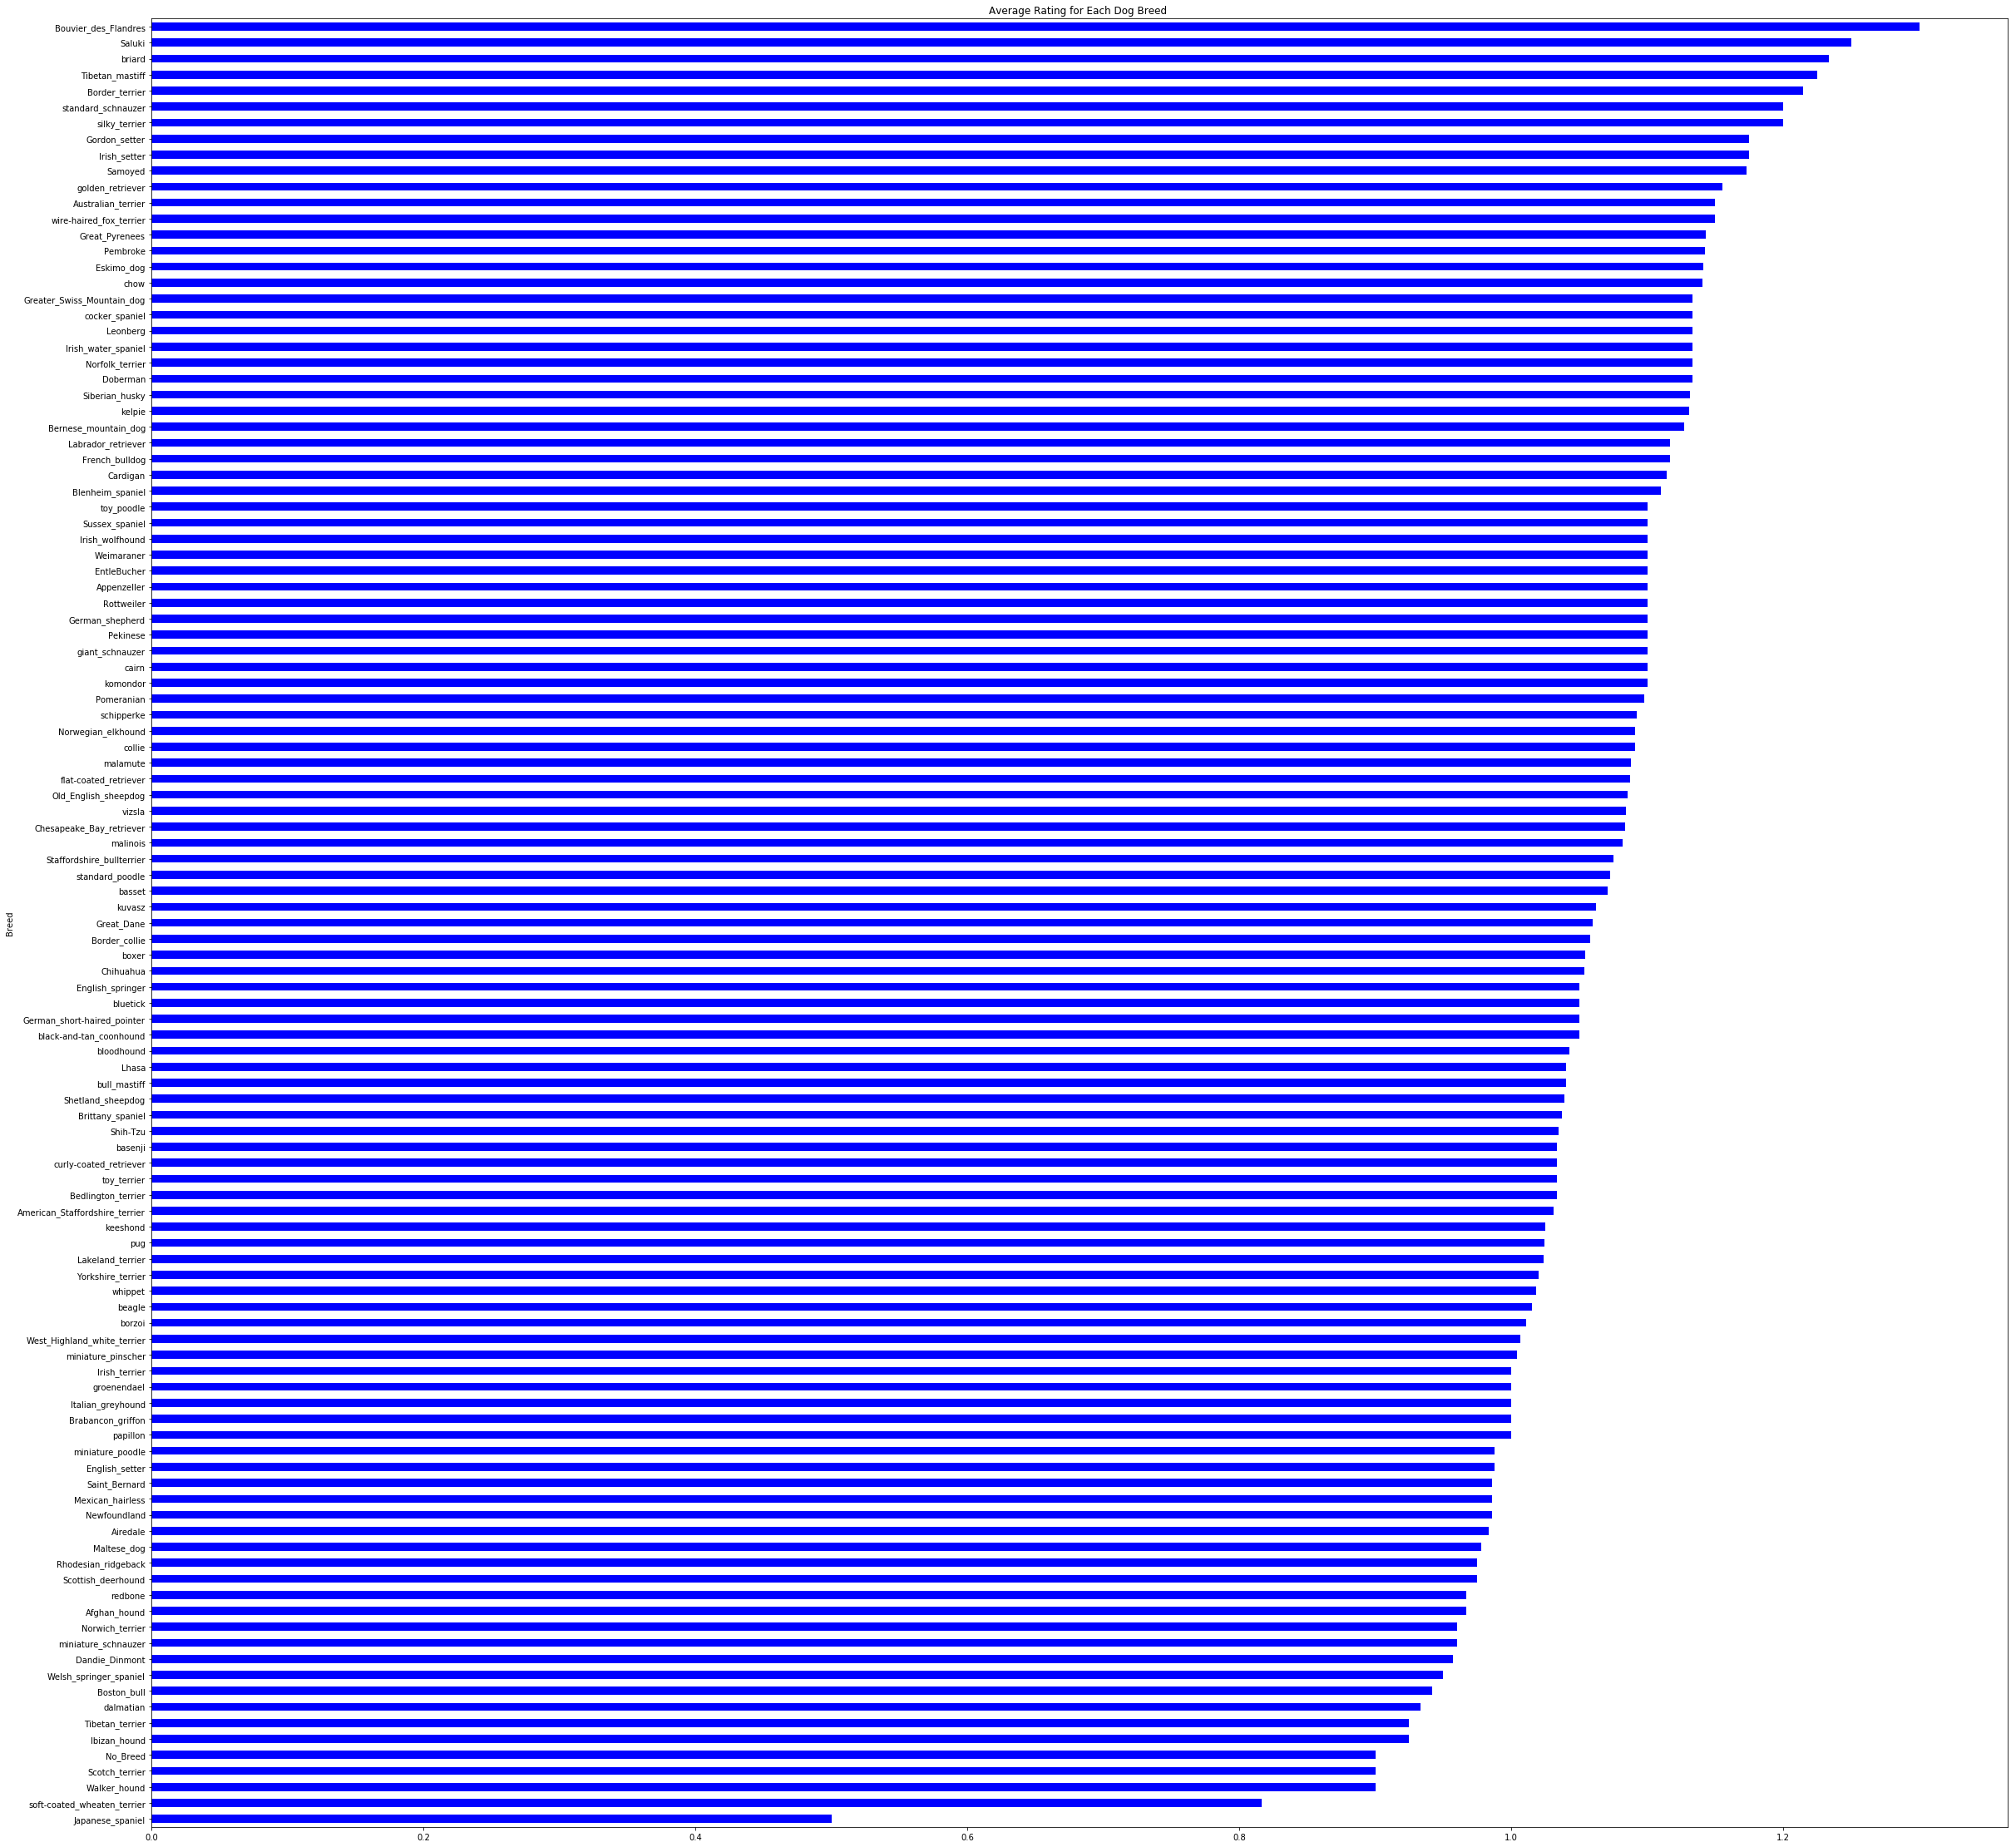

In [147]:
BreedMean = df_Copy.groupby('Breed').mean().sort_values('rating',ascending=True)

BreedMean['rating'].plot.barh(stacked=False, title = 'Average Rating for Each Dog Breed ',color='Blue', figsize=(40, 40));

<font color=blue> Now let's see the average rating for each dog stage
 </font>

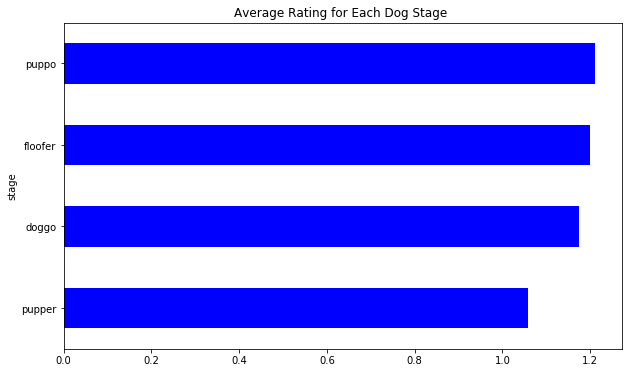

In [148]:
StageMean = df_Copy.groupby('stage').mean().sort_values('rating',ascending=True)

StageMean['rating'].plot.barh(stacked=False, title = 'Average Rating for Each Dog Stage ',color='Blue', figsize=(10, 6));